## Table of Contents
- [TO DO](#to-do)
- [Introduction](#introduction)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Correlation Heatmap](#correlation-heatmap)
- [Translate Attempts](#translate-attempts)
- [Data Preprocessing](#data-preprocessing)
- [Modeling](#modeling)
- [Scratchpad??](#scratchpad??)
- [Decision Tree](#decision-tree)
- [Pipeline](#pipeline)
- [Conclusion](#conclusion)

## TO DO {#to-do}
### ML pipeline, PCA, hyperparameter tuning, grid search, gradient boost, cross-validation, neural networks
### Not doing: Clustering
### Stretch goals: get translation working. integrate with ifixit datasets and/or API

## Introduction {#introduction}

Repairability of Consumer Electronics

Andrew Chau
kuzals@gmail.com
Summer 2023
BrainStation Toronto Data Science

This capstone project explores the success rate of repairing consumer electronics using various statistical modeling methods.


## Exploratory Data Analysis {#exploratory-data-analysis}

importing the required libraries for data manipulation (Pandas and NumPy) and visualization (MatPlotLib and Seaborn)

In [342]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

loading the dataset into a pandas dataframe using pd.read_csv()

In [343]:
df = pd.read_csv('Data/OpenRepairData_v0.3_aggregate_202303.csv')

df.info() provides an overview of the shape (103076 rows x 14 columns), names and data types of the columns, the size on disk (11MB+) of the dataset, and how complete each column in. Immediately we can see that "year_of_manufacture" and "product_age" are missing roughly 65,000 entries, and "problem" is missing about 15,000 entries. "repair_barrier_if_end_of_life" is only used for cases where an item cannot be fixed, so even though there are only 7268 entries, that number isn't out of the total 103076.

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103076 entries, 0 to 103075
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   id                             103076 non-null  object 
 1   data_provider                  103076 non-null  object 
 2   country                        103076 non-null  object 
 3   partner_product_category       103076 non-null  object 
 4   product_category               103076 non-null  object 
 5   product_category_id            103076 non-null  int64  
 6   brand                          103070 non-null  object 
 7   year_of_manufacture            37117 non-null   float64
 8   product_age                    37117 non-null   float64
 9   repair_status                  103076 non-null  object 
 10  repair_barrier_if_end_of_life  7268 non-null    object 
 11  group_identifier               103076 non-null  object 
 12  event_date                    

quick look at the first few rows of the dataset using .head()

In [345]:
df.head(8)

,id,data_provider,country,partner_product_category,product_category,product_category_id,brand,year_of_manufacture,product_age,repair_status,repair_barrier_if_end_of_life,group_identifier,event_date,problem
0,anstiftung_11539,anstiftung,DEU,Haushaltsgeräte ~ Siebträgermaschine,Coffee maker,36,Krups,1998.0,25.0,End of life,Spare parts too expensive,2711,2023-03-29,Pumpe defekt
1,anstiftung_11540,anstiftung,DEU,Elektro divers ~ Bluetooth Musik Box,Hi-Fi integrated,12,JBL,2016.0,7.0,Repairable,NaN,2711,2023-03-29,Akku lädt nicht
2,anstiftung_11541,anstiftung,DEU,Unterhaltungselektronik ~ Lautsprecher(boxen),Hi-Fi separates,13,Trust,2013.0,10.0,Fixed,NaN,2711,2023-03-29,Ohne Funktion
3,anstiftung_11542,anstiftung,DEU,Computer ~ Laptop,Laptop,16,Toshiba,2015.0,8.0,End of life,NaN,2711,2023-03-29,Netzteilbuchse und Grafikkarte defekt
4,anstiftung_11543,anstiftung,DEU,Elektro divers ~ Aktenvernichter,Paper shredder,21,Genie,2018.0,5.0,End of life,NaN,2711,2023-03-29,Getriebeschaden
5,anstiftung_11544,anstiftung,DEU,Haushaltsgeräte ~ Wasserkocher,Kettle,14,Support Plus,2018.0,5.0,End of life,No way to open product,2711,2023-03-29,ohne Funktion
6,anstiftung_11545,anstiftung,DEU,Haushaltsgeräte ~ Handrührgerät,Food processor,37,Severin,2020.0,3.0,End of life,Spare parts too expensive,2711,2023-03-29,Läuft zu schnell
7,anstiftung_11546,anstiftung,DEU,Unterhaltungselektronik ~ Radio,Portable radio,23,Philips,1993.0,30.0,Repairable,NaN,2711,2023-03-29,Kasette spielt nicht


quick look some rows at random in the dataset using .sample()

In [346]:
df.sample(8)

,id,data_provider,country,partner_product_category,product_category,product_category_id,brand,year_of_manufacture,product_age,repair_status,repair_barrier_if_end_of_life,group_identifier,event_date,problem
72186,restart_26835,The Restart Project,GBR,Hi-Fi separates ~ Speaker system,Hi-Fi separates,13,Unknown,NaN,NaN,Fixed,NaN,Share and Repair,2022-06-18,NaN
40827,rcint_32028,Repair Café International,NLD,Display and sound equipment ~ Television,TV and gaming-related accessories,33,LG,NaN,NaN,Fixed,NaN,0046,2020-09-12,veld met text op scherm en krijgt meneer niet ...
56202,restart_20530,The Restart Project,GBR,Sewing machine,Sewing machine,27,Singer,2019.0,3.0,Repairable,NaN,Chesterfield Repair Cafe,2022-01-15,Thread keeps snapping. Tension of bobbin adju...
49438,rcint_584,Repair Café International,NLD,Tools electric ~ Water pump,Power tool,24,Original,NaN,NaN,Fixed,NaN,0016,2017-04-01,lekt afdichting opnieuw afgesteld
67133,restart_446,The Restart Project,GBR,Mobile,Mobile,19,Samsung,NaN,NaN,End of life,NaN,Restart HQ,2014-02-19,Mobile - USB port - Referred to professional
37394,rcint_51049,Repair Café International,NLD,Household appliances electric ~ Milk frother,Small kitchen item,29,Severin,2021.0,1.0,End of life,Spare parts not available,0411,2022-12-04,doet niets meer condensator doorgebrand --> mi...
59383,restart_10837,The Restart Project,GBR,"Flat screen 19-20""",Flat screen,8,Panasonic,2016.0,3.0,Repairable,NaN,Chesterfield Repair Cafe,2019-01-12,Intermittent performance
77579,restart_34430,The Restart Project,GBR,Hair & beauty item ~ Shaver,Hair & beauty item,9,Unknown,NaN,NaN,Unknown,NaN,Southampton Repair Cafe,2023-03-04,NaN


quick look at the last few rows of the dataset using .tail() <br>
good to compare and contrast with the first few rows

In [347]:
df.tail(8)

,id,data_provider,country,partner_product_category,product_category,product_category_id,brand,year_of_manufacture,product_age,repair_status,repair_barrier_if_end_of_life,group_identifier,event_date,problem
103068,rcwales_7496,Repair Cafe Wales,GBR,Electrical Item ~ Small home electrical,Small home electrical,28,Unknown,NaN,NaN,End of life,Item too worn out,Mold,2022-10-30,Malfunction.
103069,rcwales_7497,Repair Cafe Wales,GBR,Electrical Item ~ Sewing machine,Sewing machine,27,Bernina,NaN,NaN,Repairable,NaN,Mold,2022-10-30,It is stuck on buttonhole mode and is seized up.
103070,rcwales_7498,Repair Cafe Wales,GBR,Electrical Item ~ Sewing machine,Sewing machine,27,Jones,NaN,NaN,Repairable,NaN,Mold,2022-10-30,Unknown probably motor.
103071,rcwales_7499,Repair Cafe Wales,GBR,Electrical Item ~ Small home electrical,Small home electrical,28,Permaplug,NaN,NaN,Fixed,NaN,Mold,2022-10-30,Extension cable for PAT testing.
103072,rcwales_7500,Repair Cafe Wales,GBR,Electrical Item ~ Misc,Misc,18,Unknown,NaN,NaN,Repairable,NaN,Mold,2022-10-30,Broken mirror.
103073,rcwales_7501,Repair Cafe Wales,GBR,Electrical Item ~ Sewing machine,Sewing machine,27,Toyota,NaN,NaN,Fixed,NaN,Mold,2022-10-30,Cotton reel spindle needs replacing.
103074,rcwales_7502,Repair Cafe Wales,GBR,Electrical Item ~ Sewing machine,Sewing machine,27,Brother,NaN,NaN,Fixed,NaN,Mold,2022-10-30,Bobbin not working.
103075,rcwales_7503,Repair Cafe Wales,GBR,Electrical Item ~ Vacuum,Vacuum,34,Hoover,NaN,NaN,Fixed,NaN,Mold,2022-10-30,It doesn’t turn on.


In [348]:
df.describe()

,product_category_id,year_of_manufacture,product_age
count,103076.000000,37117.000000,37117.000000
mean,23.369417,2008.472452,12.056543
std,10.205812,14.654064,14.560084
min,1.000000,1019.000000,-1.000000
25%,15.000000,2005.000000,4.000000
50%,24.000000,2013.000000,7.000000
75%,33.000000,2017.000000,15.000000
max,40.000000,2023.000000,998.000000


A few things look out of place from these descriptive statistics: product_category_id is not really a numerical value and should be converted. As mentioned before, the column year_of_manufacture has roughly 37,000 entries but is missing 70,000 values. Product age is calculated from year_of_manufacture (exact same number of rows) and will have incorrect values as well.

In [349]:
df.sort_values(by='year_of_manufacture', ascending=True).head(50)

,id,data_provider,country,partner_product_category,product_category,product_category_id,brand,year_of_manufacture,product_age,repair_status,repair_barrier_if_end_of_life,group_identifier,event_date,problem
23855,rcint_3615,Repair Café International,NLD,Household appliances electric ~ Food processor,Food processor,37,KitchenAid,1019.0,998.0,Repairable,NaN,0016,2017-12-02,Vastgelopen onderdelen bestellen?
13163,rcint_44808,Repair Café International,AUS,Household appliances electric ~ Paper shredder,Paper shredder,21,Unknown,1900.0,123.0,Fixed,NaN,0333,2023-01-21,Not working Not seated correctly Adjusted the ...
13155,rcint_44790,Repair Café International,AUS,Display and sound equipment ~ Amplifier,Hi-Fi separates,13,Unknown,1900.0,123.0,Repairable,NaN,0333,2023-01-21,Blown Yes Advice given
13154,rcint_44789,Repair Café International,AUS,Clocks / alarm clocks ~ Alarm clock radio,Portable radio,23,Unknown,1900.0,123.0,End of life,No way to open product,0333,2023-01-21,No sound No
13160,rcint_44795,Repair Café International,AUS,Household appliances electric ~ Electric penci...,Small home electrical,28,Unknown,1900.0,123.0,Fixed,NaN,0333,2023-01-21,Won't sharpen Foreign object inside Taken apar...
13158,rcint_44793,Repair Café International,AUS,Household appliances electric ~ Electric kettle,Kettle,14,Unknown,1900.0,123.0,End of life,NaN,0333,2023-01-21,Not working Element buggered
18504,rcint_46791,Repair Café International,FRA,Tools electric ~ Strimmer,Power tool,24,ECHO,1900.0,123.0,End of life,NaN,0156,2023-03-11,"Impossible à démarrer, problème de réglage des..."
18510,rcint_46799,Repair Café International,FRA,Household appliances electric ~ Stick mixer / ...,Food processor,37,Riviera & Bar,1900.0,123.0,End of life,Item too worn out,0293,2023-03-11,moteur bloqué
18621,rcint_46944,Repair Café International,FRA,Tools electric ~ Multimeter,Small home electrical,28,M8,1900.0,123.0,End of life,NaN,0532,2023-02-18,Plus d'affichage à l'écran. Nappe de l'écran à...
18802,rcint_47156,Repair Café International,FRA,Computer equipment / phones ~ Printer,Printer/scanner,25,Epson,1900.0,123.0,Repairable,NaN,0183,2023-01-28,Bourrage papier Tige plastique délogée Remett...


changing suspicious and outright incorrect "year_of_manufacture" and "product_age" values to NaN

In [350]:
#df = df.loc[df['product_age'] > 100, ['year_of_manufacture', 'product_age']] = 'Unknown'
# df['product_age'] = df.apply(lambda row: 'unknown' if row['product_age'] > 100 else row['product_age'], axis=1)
#df.loc[df['year_of_manufacture'] < 1920, 'year_of_manufacture'] = 'NaN'
#df['year_of_manufacture'] = np.where(df['year_of_manufacture'] < 1920, 'NaN', df['year_of_manufacture'])
#df['year_of_manufacture'].replace(1900.0, np.NaN)
#df['year_of_manufacture'] = df.year_of_manufacture.where(df.year_of_manufacture.between(0, 1919))
df.loc[df.year_of_manufacture.between(0.0, 1919.0), ['year_of_manufacture', 'product_age']] = np.nan

In [305]:
df.sort_values(by='product_age', ascending=True).head(50)

,id,data_provider,country,partner_product_category,product_category,product_category_id,brand,year_of_manufacture,product_age,repair_status,repair_barrier_if_end_of_life,group_identifier,event_date,problem
6342,anstiftung_6237,anstiftung,DEU,Unterhaltungselektronik ~ CD-Player,Handheld entertainment device,10,Unknown,2021.0,-1.0,Unknown,NaN,2711,2020-10-21,Schaden auf der Platine
37383,rcint_29126,Repair Café International,NLD,Household appliances electric ~ Air fryer,Small kitchen item,29,Philips,2020.0,0.0,Fixed,NaN,0041,2020-02-01,kabelbreuk nieuw snoer
37126,rcint_24428,Repair Café International,NLD,Household appliances electric ~ Sewing machine,Sewing machine,27,Singer,2019.0,0.0,Fixed,NaN,0024,2019-11-02,Nieuwe naaimachine ; advies N.V.T. Uitleg gegeven
6872,anstiftung_6097,anstiftung,DEU,Unterhaltungselektronik ~ Lautsprecher(boxen),Hi-Fi separates,13,JBL,2020.0,0.0,Repairable,NaN,2711,2020-07-29,USB-Buchse kaputt
37496,rcint_34495,Repair Café International,NLD,Toys electric ~ Toy car,Toy,32,Unknown,2021.0,0.0,Fixed,NaN,0036,2021-06-01,doet niks los contact in de afstandsbediening ...
37127,rcint_24158,Repair Café International,NLD,Household appliances electric ~ Lamp / lighting,Lamp,15,Trio Leuchten,2019.0,0.0,Fixed,NaN,0016,2019-11-02,weerstand moet er in printplaat van dimmer def...
37497,rcint_51113,Repair Café International,NLD,Household appliances electric ~ Induction hob,Small kitchen item,29,SilverCrest,2022.0,0.0,End of life,Item too worn out,0412,2022-12-14,Werkt niet Is nat geworden Is nat geworden daa...
36184,rcint_3750,Repair Café International,NLD,Household appliances electric ~ Earphone,Headphones,11,Samsung,2017.0,0.0,End of life,NaN,0024,2017-12-02,snoertje is los
37128,rcint_24364,Repair Café International,NLD,Household appliances electric ~ Clipper / trimmer,Small home electrical,28,Surker,2019.0,0.0,End of life,NaN,0009,2019-11-02,werkt niet oplader werkt niet ?
37498,rcint_51114,Repair Café International,NLD,Household appliances electric ~ Foot warmer / ...,Small home electrical,28,Alpina,2022.0,0.0,Fixed,NaN,0192,2022-12-21,"slaat steeds af lastig te bedienen getest, uit..."


quick overview of the distribution of the numerical values using .describe()

In [351]:
df.describe()

,product_category_id,year_of_manufacture,product_age
count,103076.000000,37068.000000,37068.000000
mean,23.369417,2008.631326,11.896749
std,10.205812,13.229585,13.123295
min,1.000000,1920.000000,-1.000000
25%,15.000000,2006.000000,4.000000
50%,24.000000,2013.000000,7.000000
75%,33.000000,2017.000000,15.000000
max,40.000000,2023.000000,103.000000


correcting 'product_age' values that are negative using df.loc

In [352]:
df.loc[df['product_age'] < 0, 'product_age'] = 0

In [353]:
df.describe()

,product_category_id,year_of_manufacture,product_age
count,103076.000000,37068.000000,37068.000000
mean,23.369417,2008.631326,11.896776
std,10.205812,13.229585,13.123269
min,1.000000,1920.000000,0.000000
25%,15.000000,2006.000000,4.000000
50%,24.000000,2013.000000,7.000000
75%,33.000000,2017.000000,15.000000
max,40.000000,2023.000000,103.000000


In [309]:
dfc = df

In [357]:
df['repair_status'].value_counts()

Fixed          54295
End of life    24433
Repairable     20948
Unknown         3400
Name: repair_status, dtype: int64

In [358]:
df['product_category'].value_counts()

Vacuum                               7308
Lamp                                 6688
Hi-Fi separates                      6474
Laptop                               6472
Coffee maker                         6295
Power tool                           5521
Small kitchen item                   4987
Portable radio                       4668
Food processor                       4649
Small home electrical                3551
Watch/clock                          3406
Sewing machine                       3318
Mobile                               2792
TV and gaming-related accessories    2548
Toaster                              2392
Iron                                 2294
Printer/scanner                      2202
Large home electrical                2180
Kettle                               2167
Misc                                 2037
Toy                                  2016
Decorative or safety lights          1941
Hair & beauty item                   1881
Tablet                            

In [359]:
df['brand'].nunique()

9061

In [362]:
df['brand'].unique()

array(['Krups', 'JBL', 'Trust', ..., 'Dihl', 'Solar light', 'Permaplug'],
      dtype=object)

In [360]:
df['country'].value_counts()

NLD    28318
GBR    27790
DEU    13475
BEL    13418
DNK     5163
FRA     4002
CAN     2415
ITA     1762
USA     1482
NOR     1156
ESP      776
AUS      631
ARG      617
SWE      543
NZL      307
JEY      230
AUT      181
HKG      178
ISR      166
IRL      157
TUN       98
CHE       95
ISL       91
ZAF       10
BEN        9
LUX        3
TWN        3
Name: country, dtype: int64

In [364]:
pd.crosstab(df['country'], df['product_category'])

product_category,Aircon/dehumidifier,Battery/charger/adapter,Coffee maker,DSLR/video camera,Decorative or safety lights,Desktop computer,Digital compact camera,Fan,Flat screen,Food processor,...,Projector,Sewing machine,Small home electrical,Small kitchen item,TV and gaming-related accessories,Tablet,Toaster,Toy,Vacuum,Watch/clock
country,,,,,,,,,,,,,,,,,,,,,
ARG,3,21,8,1,13,0,2,32,2,84,...,8,2,7,22,30,13,9,34,11,5
AUS,1,10,20,1,16,3,3,7,0,46,...,1,18,44,28,10,1,32,26,36,37
AUT,0,3,24,2,2,0,0,1,1,11,...,0,13,3,12,8,1,2,3,13,6
BEL,67,195,1123,19,220,104,68,98,227,609,...,49,383,271,1150,271,112,319,184,1123,181
BEN,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
CAN,10,21,16,3,22,166,7,45,4,59,...,2,30,38,77,12,219,38,14,55,81
CHE,1,1,5,0,1,2,2,1,1,0,...,2,2,0,4,2,0,1,2,3,2
DEU,28,222,714,122,277,93,94,38,245,855,...,61,453,648,533,324,167,294,262,793,291
DNK,12,132,164,7,120,84,29,28,67,314,...,37,341,345,192,121,43,119,133,302,172


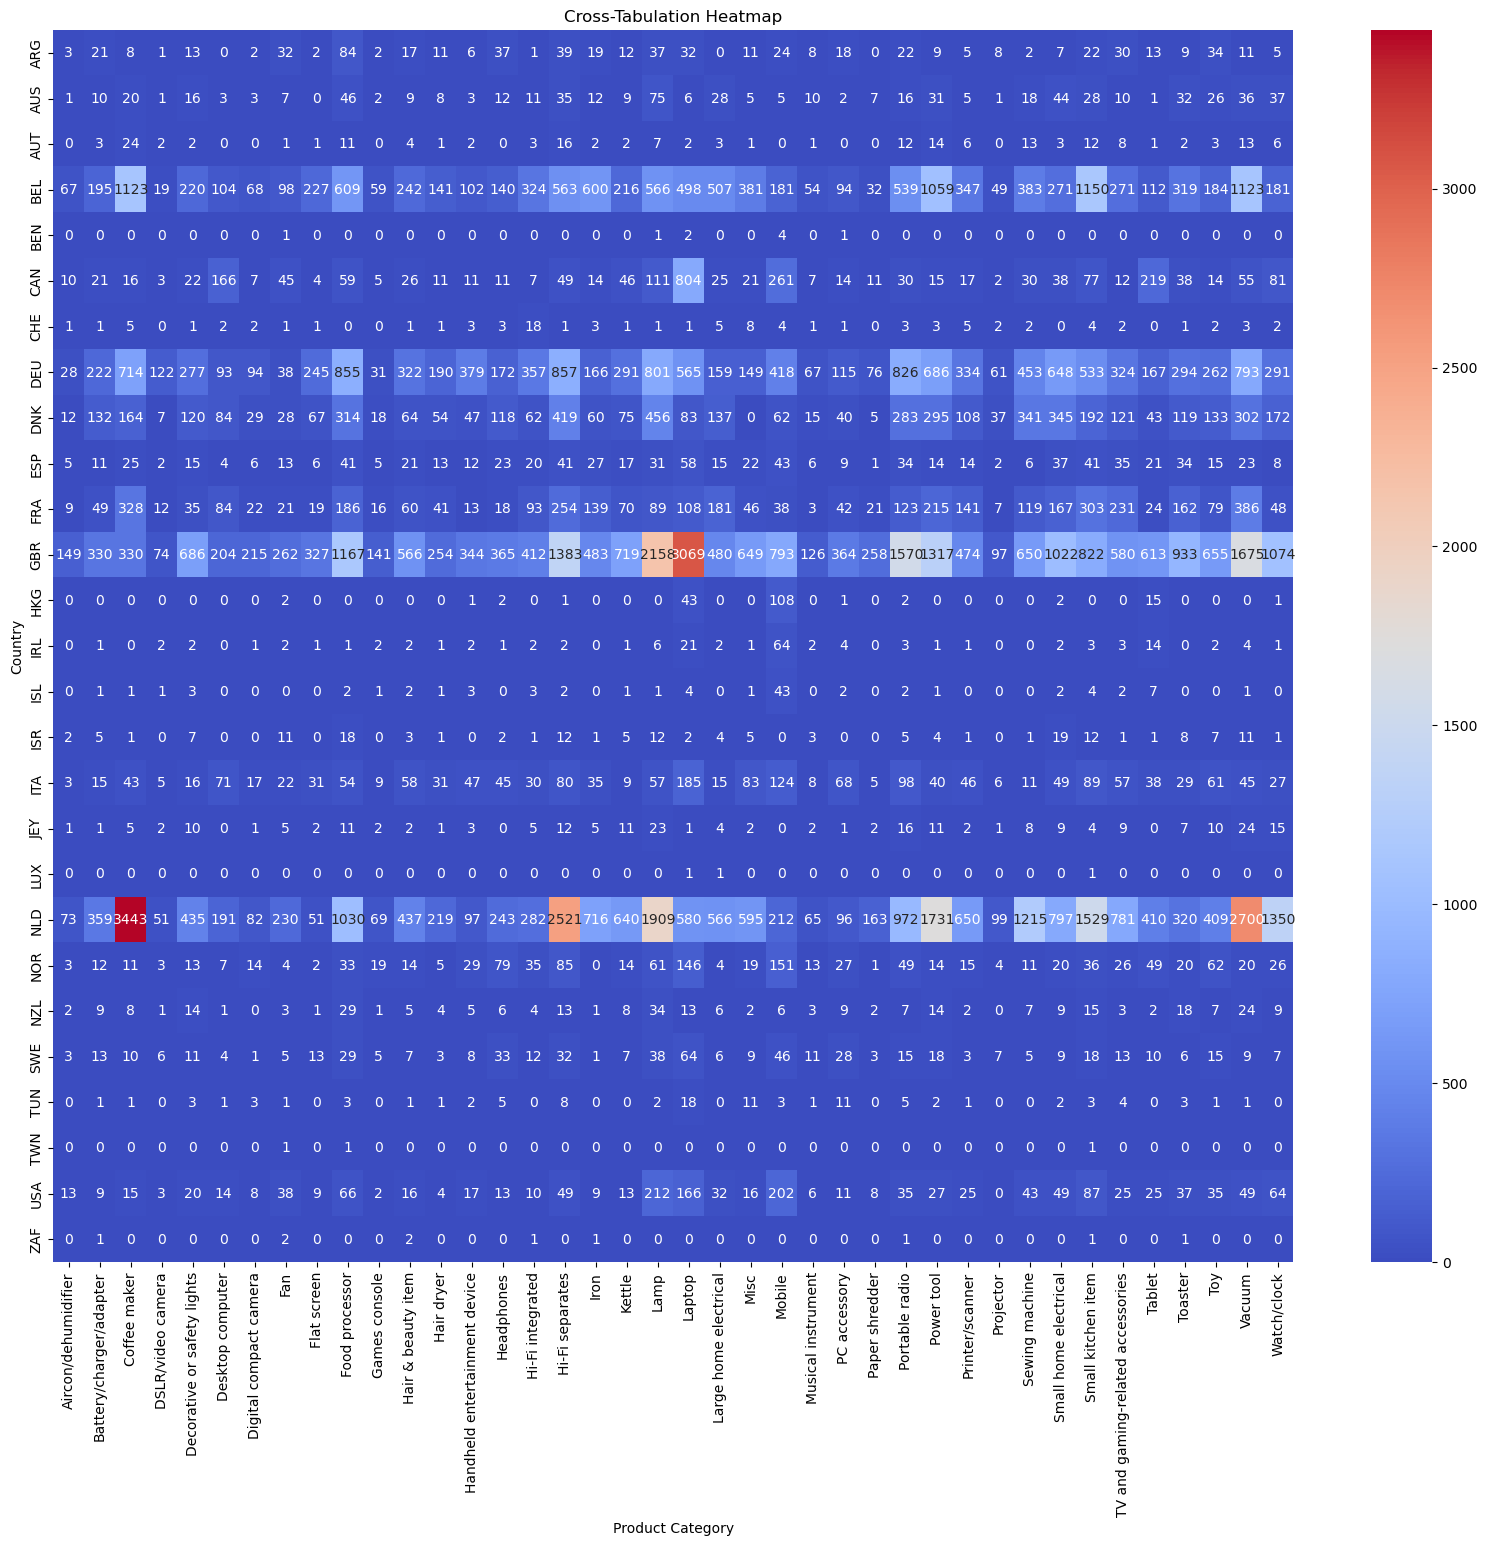

In [367]:
cross_tab = pd.crosstab(df['country'], df['product_category'])

# Create a heatmap using Seaborn
plt.figure(figsize=(20, 16))  # Adjust the figure size as needed
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='coolwarm')

# Add labels and a title
plt.xlabel('Product Category')
plt.ylabel('Country')
plt.title('Cross-Tabulation Heatmap')

# Show the plot
plt.show()

## Correlation Heatmap {#correlation-heatmap}

## Translate Attempts {#translate-attempts}

In [318]:
# EasyNMT translation library
from easynmt import EasyNMT
model = EasyNMT("opus-mt")

df["problem"] = df.apply(lambda row: model.translate(row["problem"], target_lang="en"), axis=1)

ModuleNotFoundError: No module named 'torch.multiprocessing'

In [ ]:
# trying to isolate language by country
df_en = df[df['country']=='GBR']
df_en

In [ ]:
#trying to isolate language by country
df_g = df[df['country']=='DEU']
df_g

In [ ]:
# attempting to use google translation library
df_g["problem"] = df_g.apply(lambda row: model.translate(row["problem"], target_lang="en"), axis=1)

In [ ]:
# dropping null values to provide cleaner data to the translator
df_g = df_g.dropna()
df_g

In [ ]:
# trying to use google translator library instead
import googletrans    
from googletrans import Translator


translator = Translator()
df_g['translated'] = df_g['problem'].apply(lambda x: translator.translate(x, dest='en').text)


In [ ]:
# trying to use google translator library
df_g["problem"] = df.apply(lambda row: model.translate(row["problem"], target_lang="en"), axis=1)

In [ ]:
import googletrans
from googletrans import Translator

In [ ]:
#backtracking to check functionality at a more basic level - code source: StackOverflow
translator = Translator()
langdict = {0: {'English': 'Hello', 'Japanese': 'こんにちは'}, 1: {'English': 'Thanks', 'Japanese': 'ありがとう'}}
df = pd.DataFrame(langdict).T
df['TranslatedText'] = df['Japanese'].apply(lambda x: translator.translate(x, src='auto', dest='en').text )
print(df)

In [ ]:
#attempting a different google translate library
pip install google_trans_new

In [ ]:
#attempting a different google translate library
from google_trans_new import google_translator

In [ ]:
#attempting a different google translate library
translator = google_translator()  
translate_text = translator.translate('Hola mundo!', lang_src='es', lang_tgt='en')  
print(translate_text)

In [ ]:
#attempting yet another translate library
pip install -U deep-translator

In [ ]:
#attempting yet another translate library
from deep_translator import GoogleTranslator
df['TranslatedText'] = df_g['problem'].apply(lambda x: GoogleTranslator.translate(x, src='auto', target='en').text)


So far, every translation library has errored out. But I'm making progress and will continue to sort out the 'problem' column to gain more insights

## Scratchpad?? {#scratchpad??}

In [ ]:
pip install kmodes

In [ ]:
from kmodes.kmodes import KModes
from scipy.stats import mode

In [ ]:
kmdf = pd.read_csv('Data/OpenRepairData_v0.3_aggregate_202303.csv')

In [ ]:
data = kmdf[['repair_status', 'brand' , 'product_category']]

In [ ]:
data = data.fillna(0)
data.isnull().sum()

repair_status       0
brand               0
product_category    0
dtype: int64

In [ ]:
data.to_numpy()

array([['End of life', 'Krups', 'Coffee maker'],
       ['Repairable', 'JBL', 'Hi-Fi integrated'],
       ['Fixed', 'Trust', 'Hi-Fi separates'],
       ...,
       ['Fixed', 'Toyota', 'Sewing machine'],
       ['Fixed', 'Brother', 'Sewing machine'],
       ['Fixed', 'Hoover', 'Vacuum']], dtype=object)

In [ ]:
km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(data)

# Print the cluster centroids
print(km.cluster_centroids_)

NameError: name 'KModes' is not defined

.to_numpy() convert to numpy array

In [ ]:
# Elbow curve to find optimal K
'''cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()'''



In [ ]:
X = X[X.columns[~X.columns.isin(['repair_status'])]]
X

,product_category_Battery/charger/adapter,product_category_Coffee maker,product_category_DSLR/video camera,product_category_Decorative or safety lights,product_category_Desktop computer,product_category_Digital compact camera,product_category_Fan,product_category_Flat screen,product_category_Food processor,product_category_Games console,...,brand_zanussi,brand_zanussi combi oven,brand_zennoer,brand_zigzag Deluxe Krëfel,brand_zonder,brand_zoom,brand_à feuilles,brand_à main,brand_ældre model,brand_國騰
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103068,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103071,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103073,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103074,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df2 = pd.read_csv('Data/OpenRepairData_v0.3_aggregate_202303.csv')

In [ ]:
df_quickclean = df2.dropna()

In [ ]:

X = df_quickclean['product_category_id'] # Only use the first two features so we can visualize
y = df_quickclean['repair_status']

#Plot
plt.scatter(X[y==1, 0], X[y==1, 1], s=20, c="yellow", label="Fixed")
plt.scatter(X[y==0, 0], X[y==0, 1], s=20, c="purple", label="Not fixed")
plt.legend()
plt.show()

KeyError: 'key of type tuple not found and not a MultiIndex'

In [ ]:
df_quickclean

# count vectorize NLP
# pd crosstab
# distribution visualizations
# logistic regression modeling
# more markdown



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#fill in na with unknown
X = df_quickclean[['product_category','country','product_age','brand']]
y = df_quickclean['repair_status']

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=12)

tree_model = DecisionTreeClassifier(random_state=12)

tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


In [ ]:
#from sklearn.metrics import accuracy_score, confusion_matrix
# Create confusion matrix
#confusion = confusion_matrix(y_test, y_pred)

# Create a heatmap using Seaborn
#plt.figure(figsize=(8, 6))
#sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
           # xticklabels=tree_model.classes_,
           # yticklabels=tree_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer


df_quickclean['problem_tokens'] = df_quickclean['problem'].str.split()

mlb = MultiLabelBinarizer()


onehot_encoded_words = mlb.fit_transform(df_quickclean['problem_tokens'])


onehot_encoded_df = pd.DataFrame(onehot_encoded_words, columns=mlb.classes_)


df_encoded = pd.concat([df_quickclean, onehot_encoded_df], axis=1)

df_encoded.drop(['problem', 'problem_tokens'], axis=1, inplace=True)

In [ ]:
df_encoded

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming you have your DataFrame 'df_encoded' and 'repair_status' column

target_column = 'repair_status'
columns_to_exclude = [target_column]  # Add any columns you want to exclude from modeling

for column in df_encoded.columns:
    if column not in columns_to_exclude:
        X = df_encoded[[column]]  # Select the current column as the feature
        y = df_encoded[target_column]  # Target variable

        X_encoded = pd.get_dummies(X)  # One-hot encode categorical variables if needed

        X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=12)

        tree_model = DecisionTreeClassifier(random_state=12)
        tree_model.fit(X_train, y_train)
        y_pred = tree_model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy for column '{column}': {accuracy:.2f}")


In [ ]:
X = df_encoded['']
y = df_encoded['repair_status']

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=12)

tree_model = DecisionTreeClassifier(random_state=12)

tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
k=2

kmeans = KMeans(n_clusters = k)
kmeans.fit(df_quickclean)
labels = kmeans.predict(df_quickclean)

inertia = kmeans.inertia_
sil_score = silhouette_score(df_quickclean, labels)

In [ ]:
conda install XLMRobertaTokenizer from transformers

In [ ]:
import pandas as pd
from transformers import XLMRobertaTokenizer

# Load the XLM-R tokenizer
tokenizer = XLMRobertaTokenizer.from_pretrained("xlm-roberta-base")

# Create a sample DataFrame
data = {
    "description": [
        "Hello, how are you?",
        "Bonjour, comment ça va ?",
        "Hola, ¿cómo estás?",
        "Ciao, come stai?"
    ]
}
df = pd.DataFrame(data)

# Tokenize the descriptions in the DataFrame
tokenized_descriptions = []

for description in df["description"]:
    tokens = tokenizer.tokenize(description)
    tokenized_descriptions.append(tokens)

df["tokenized_description"] = tokenized_descriptions

print(df)
## In this example, the tokenizer.tokenize method is applied to each description in the "description" column of the DataFrame. The resulting tokenized sequences are stored in a new column called "tokenized_description."

## Keep in mind that tokenizing large amounts of text can be time-consuming. If you have a large DataFrame, you might want to consider using parallel processing or batching the tokenization process for better performance.







In [ ]:
import pandas as pd
from transformers import XLMRobertaTokenizer

# Load the XLM-R tokenizer
tokenizer = XLMRobertaTokenizer.from_pretrained("xlm-roberta-base")

# Create a sample DataFrame
data = {
    "description": [
        "Hello, how are you?",
        "Bonjour, comment ça va ?",
        "Hola, ¿cómo estás?",
        "Ciao, come stai?"
    ]
}
df = pd.DataFrame(data)

# Tokenize individual words in the descriptions
tokenized_word_lists = []

for description in df["description"]:
    words = description.split()  # Split text into words
    tokens = [tokenizer.tokenize(word) for word in words]
    tokenized_word_lists.append(tokens)

df["tokenized_words"] = tokenized_word_lists

print(df)
# In this version of the code, the description text is split into individual words using the split() method. Then, the XLM-R tokenizer is applied to each word separately, resulting in tokenized sequences for individual words. The tokenized word sequences are stored in a new column called "tokenized_words."

# Please note that this approach tokenizes words within the text, and words are often broken down into subword tokens. If you want to preserve the original words while tokenizing, you might need to adapt the code accordingly.







In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = {
    "tokenized_words": [
        [["Eating"], ["a"], ["monster"], ["sandwich"]],
        [["Bonjour"], ["comment"], ["ça", "va", "?"]],
        [["Hola"], ["cómo"], ["estás", "?"]],
        [["Ciao"], ["come"], ["stai", "?"]]
    ],
    "target": [10, 20, 30, 40]  # Example target values
}
df = pd.DataFrame(data)

# Flatten tokenized words
df["flat_tokenized_words"] = df["tokenized_words"].apply(lambda x: [word for sublist in x for word in sublist])

# Convert tokenized words to text
df["text"] = df["flat_tokenized_words"].apply(lambda x: " ".join(x))

# Convert text to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["text"])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df["target"], test_size=0.2, random_state=42)

# Initialize and train a linear regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [ ]:
label_encoders = {}
for col in df["Product_Category", "Age", "Country"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split data into features and target
X = df.drop("F", axis=1)
y = df["F"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the decision tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

to do: grid search, gradient boost, cross-validation

## Decision Tree {#decision-tree}

In [ ]:
#df = pd.read_csv("data/OpenRepairData_v0.3_aggregate_202303.csv")

In [369]:
dtdf = dfc[['repair_status', 'product_category', 'country','brand']]
#dtdf = dfc[['repair_status', 'product_category', 'country']]

In [370]:
dtdf = dtdf.drop(dtdf[dtdf['repair_status'] == 'Unknown'].index)
dtdf['repair_status']

0         End of life
1          Repairable
2               Fixed
3         End of life
4         End of life
             ...     
103071          Fixed
103072     Repairable
103073          Fixed
103074          Fixed
103075          Fixed
Name: repair_status, Length: 99676, dtype: object

In [371]:
dtdf = dtdf.drop(dtdf[dtdf['repair_status'] == 'Repairable'].index)
dtdf['repair_status']

0         End of life
2               Fixed
3         End of life
4         End of life
5         End of life
             ...     
103068    End of life
103071          Fixed
103073          Fixed
103074          Fixed
103075          Fixed
Name: repair_status, Length: 78728, dtype: object

In [372]:
repair_dataset = dtdf
print(repair_dataset["repair_status"].value_counts())


Fixed          54295
End of life    24433
Name: repair_status, dtype: int64


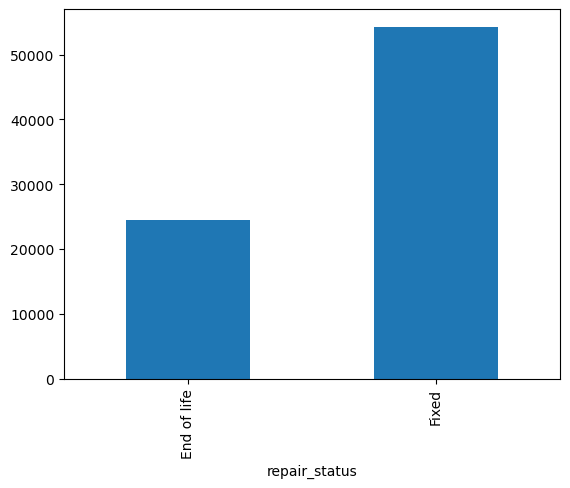

In [373]:
repair_dataset.groupby('repair_status').size().plot(kind='bar',
                                       y = "v1",
                                       label = "Type"
                                       )

In [374]:
fixed = repair_dataset[repair_dataset["repair_status"] == "Fixed"]
EOL  = repair_dataset[repair_dataset["repair_status"] == "End of life"]
print(fixed.shape)
print(EOL.shape)

(54295, 4)
(24433, 4)


# https://wellsr.com/python/upsampling-and-downsampling-imbalanced-data-in-python/
# https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [375]:
from sklearn.utils import resample
fixed_downsample = resample(fixed,
             replace=True,
             n_samples=len(EOL),
             random_state=42)

print(fixed_downsample.shape)

(24433, 4)


Fixed          24433
End of life    24433
Name: repair_status, dtype: int64


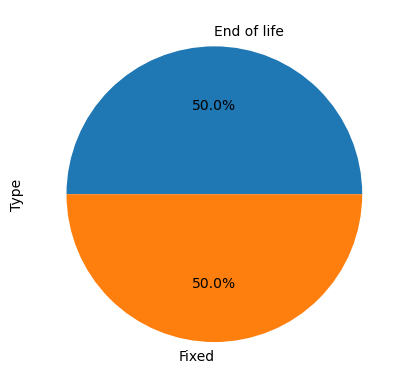

In [376]:
data_downsampled = pd.concat([fixed_downsample, EOL])

print(data_downsampled["repair_status"].value_counts())

data_downsampled.groupby('repair_status').size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [377]:
dtdf = data_downsampled

In [378]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
dtdf['repair_status_encoded'] = label_encoder.fit_transform(dtdf['repair_status'])

# Use one-hot encoding for 'country' and 'product_category'
data_encoded = pd.get_dummies(dtdf, columns=['product_category','country','brand'], drop_first=True)
# data_encoded = pd.get_dummies(dtdf, columns=['product_category','country'], drop_first=True)

# Separate features and target variable
X = data_encoded.drop('repair_status_encoded', axis=1)
y = data_encoded['repair_status_encoded']

In [380]:
X = X[X.columns[~X.columns.isin(['repair_status'])]]
X

,product_category_Battery/charger/adapter,product_category_Coffee maker,product_category_DSLR/video camera,product_category_Decorative or safety lights,product_category_Desktop computer,product_category_Digital compact camera,product_category_Fan,product_category_Flat screen,product_category_Food processor,product_category_Games console,...,brand_workzone,brand_wurlitzer,brand_wurth,brand_xantlite,brand_xbox,brand_xiaomi,brand_zanussi,brand_zennoer,brand_zigzag Deluxe Krëfel,brand_ældre model
29637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1511,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72674,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84936,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21077,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103054,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103062,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [381]:
y

29637     1
1511      1
72674     1
84936     1
21077     1
         ..
103054    0
103062    0
103065    0
103067    0
103068    0
Name: repair_status_encoded, Length: 48866, dtype: int32

## modeling results {"Modeling Results"}

In [382]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [383]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the decision tree model
clf = DecisionTreeClassifier(random_state=69)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6130550439942705


In [384]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [385]:
y_pred = classifier.predict(X_test)

In [386]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3192 1755]
 [2032 2795]]
              precision    recall  f1-score   support

           0       0.61      0.65      0.63      4947
           1       0.61      0.58      0.60      4827

    accuracy                           0.61      9774
   macro avg       0.61      0.61      0.61      9774
weighted avg       0.61      0.61      0.61      9774



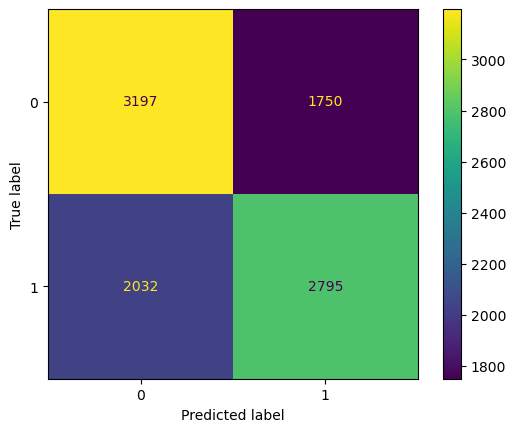

In [387]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [388]:
def PlotBoundaries(model, X, Y, dot_size=20, figsize=(10,7)) :
    '''
    Helper function that plots the decision boundaries of a model and data (X,Y)
    code modified from: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
    '''
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1,X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=figsize)
    plt.contourf(xx, yy, Z, alpha=0.4)

    #Plot
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=dot_size, edgecolor='k')
    plt.show()

In [391]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Fitting the linear model
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

# Visualize its results
PlotBoundaries(LR_model, X_train, y_train) 

# Evaluate its classification accuracy (Just on the training set for now)
print(f"Train set accuracy: {LR_model.score(X_train, y_train)}")

c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


InvalidIndexError: (slice(None, None, None), 0)

Error: c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

In [390]:
LogisticRegression(solver='lbfgs', max_iter=1000000)

LogisticRegression(max_iter=1000000)

## Natural Langauge Processing {#NLP}

In [393]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

Loading the dataset into a pandas dataframe with pd.read_csv()
then reducing it down to just the 'repair_status' and 'problem' columns

In [392]:
#ldf = pd.read_csv("data/OpenRepairData_v0.3_aggregate_202303.csv")
ldf = dfc
ldf = ldf[['repair_status', 'problem']]
ldf

,repair_status,problem
0,End of life,Pumpe defekt
1,Repairable,Akku lädt nicht
2,Fixed,Ohne Funktion
3,End of life,Netzteilbuchse und Grafikkarte defekt
4,End of life,Getriebeschaden
...,...,...
103071,Fixed,Extension cable for PAT testing.
103072,Repairable,Broken mirror.
103073,Fixed,Cotton reel spindle needs replacing.
103074,Fixed,Bobbin not working.


looking for total "na" values in 'repair_status' column with .isna().sum() - found 0

In [394]:
ldf['repair_status'].isna().sum()

0

looking for total "na" values in 'problem' column using .isna().sum() - found 15,045

In [396]:
ldf['problem'].isna().sum()

15045

replace all "Na" values with "blank"

In [397]:
ldf = ldf.fillna('blank')

use .drop to remove all rows with "Unknown" in the 'repair_status' column to simplify modeling
and check to see that it took effect

In [398]:
ldf = ldf.drop(ldf[ldf['repair_status'] == 'Unknown'].index)
ldf['repair_status']

0         End of life
1          Repairable
2               Fixed
3         End of life
4         End of life
             ...     
103071          Fixed
103072     Repairable
103073          Fixed
103074          Fixed
103075          Fixed
Name: repair_status, Length: 99676, dtype: object

use .drop to remove all rows with "Repairable" in the 'repair_status' column to simplify modeling
and check to see that it took effect

In [399]:
ldf = ldf.drop(ldf[ldf['repair_status'] == 'Repairable'].index)
ldf['repair_status']

0         End of life
2               Fixed
3         End of life
4         End of life
5         End of life
             ...     
103068    End of life
103071          Fixed
103073          Fixed
103074          Fixed
103075          Fixed
Name: repair_status, Length: 78728, dtype: object

use .loc to find all rows with "Fixed" in the 'repair_status' column

In [400]:
fixed_df = ldf.loc[ldf['repair_status'] == 'Fixed']
fixed_df

,repair_status,problem
2,Fixed,Ohne Funktion
10,Fixed,Softwareproblem
11,Fixed,Klappe klemmt
12,Fixed,ohne Funktion
13,Fixed,Schalter defekt
...,...,...
103063,Fixed,Dab radiodoesn't switch on.
103071,Fixed,Extension cable for PAT testing.
103073,Fixed,Cotton reel spindle needs replacing.
103074,Fixed,Bobbin not working.


choosing a random sample of 1000 rows to make processing faster

In [401]:
simple_data_f = fixed_df.sample(n=1000, random_state=1)
simple_data_f

,repair_status,problem
37832,Fixed,brandt nt peertje kapot alles doorgemeten en m...
29129,Fixed,DVD schijfje komt er niet uit - snaar snaar v...
36257,Fixed,Na half uurtje draaien komt er rook uit de mot...
14313,Fixed,needs to be put back together loose parts put ...
69024,Fixed,Broken Screen
...,...,...
39824,Fixed,kabelbreuk
52932,Fixed,Op toestel bevindt zich een schermpje(zie foto...
45527,Fixed,Hapert Filters vervuild Filters schoongemaakt
21943,Fixed,Not working Faulty battery


tokenizing the text data using str.split() to create lists of words from every sentence

In [328]:
simple_data_f['problem'].str.split(' ')

37832    [brandt, nt, peertje, kapot, alles, doorgemete...
29129    [DVD, schijfje, komt, er, niet, uit, -, snaar,...
36257    [Na, half, uurtje, draaien, komt, er, rook, ui...
14313    [needs, to, be, put, back, together, loose, pa...
69024                                     [Broken, Screen]
                               ...                        
39824                                         [kabelbreuk]
52932    [Op, toestel, bevindt, zich, een, schermpje(zi...
45527    [Hapert, Filters, vervuild, Filters, schoongem...
21943                      [Not, working, Faulty, battery]
79529    [Cosses, de, l’interrupteur, oxydées,, réparat...
Name: problem, Length: 1000, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [329]:
bagofwords = CountVectorizer()

bagofwords.fit(simple_data_f['problem'])

small_transformed = bagofwords.transform(simple_data_f['problem'])
small_transformed

<1000x2777 sparse matrix of type '<class 'numpy.int64'>'
	with 6846 stored elements in Compressed Sparse Row format>

In [330]:
bagofwords.get_feature_names_out()

array(['10', '100', '11', ..., 'überbrücken', 'überbrückt', 'überprüft'],
      dtype=object)

In [331]:
small_transformed.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
# add more features
# more markdown
# multiple models
# hyperparameter tuning
# if every model is named uniquely ... fformatting 
# upsampling / downsampling 


In [332]:
df = pd.DataFrame(columns=bagofwords.get_feature_names_out(), data=small_transformed.toarray())
display(df)

,10,100,11,110gr,12,12v,145,146,17,2020,...,één,éénmaal,être,öffnen,ölen,ønstalleerd,über,überbrücken,überbrückt,überprüft
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## NLP ROUND 2

dividing the data between train and test sections using sklearn's train_test_split 

In [402]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [445]:
#ndf = pd.read_csv("data/OpenRepairData_v0.3_aggregate_202303.csv")
ndf = dfc

In [446]:
ndf['country'].unique()

array(['DEU', 'AUT', 'AUS', 'BEL', 'CAN', 'CHE', 'ESP', 'FRA', 'GBR',
       'HKG', 'IRL', 'ISR', 'NLD', 'NZL', 'SWE', 'USA', 'ZAF', 'LUX',
       'NOR', 'ARG', 'ITA', 'ISL', 'JEY', 'TUN', 'BEN', 'DNK', 'TWN'],
      dtype=object)

using df.loc[] and .isin() to select only the rows where the country has English as its first language, in order to select only English entries

In [447]:
ndf = (df.loc[ndf['country'].isin(['GBR','CAN', 'AUS', 'NZL', 'IRL', 'USA'])])

In [449]:
ndf = ndf[['repair_status', 'problem']]
ndf

,repair_status,problem
12556,Fixed,Volume control not working. Dirty switches Cle...
12557,Fixed,Blades not turning. Probably motor temporarily...
12558,End of life,Unknown Possible broken belt
12559,End of life,Power short out Internal fault
12560,End of life,Won't grind Thermal fuse blown and motor seized
...,...,...
103071,Fixed,Extension cable for PAT testing.
103072,Repairable,Broken mirror.
103073,Fixed,Cotton reel spindle needs replacing.
103074,Fixed,Bobbin not working.


In [450]:
ndf = ndf.fillna('blank')

In [451]:
X = ndf['problem']
y = ndf['repair_status']

In [452]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [453]:
X_train.shape

(26225,)

In [454]:
y_train.shape

(26225,)

In [455]:
print(f"the shape of x_train is {X_train.shape}")

the shape of x_train is (26225,)


In [456]:
bagofwords = CountVectorizer()

bagofwords.fit (X_train)

X_train_transformed = bagofwords.transform(X_train)
X_train_transformed

<26225x10079 sparse matrix of type '<class 'numpy.int64'>'
	with 188544 stored elements in Compressed Sparse Row format>

In [457]:
words = bagofwords.get_feature_names_out()
some_indices = range(1, 10079, round(10079/10))

samples = [words[i] for i in some_indices]
print(samples)

['001', 'ball', 'compete', 'easier', 'gunged', 'lightblue', 'ozito', 'registered', 'solidly', 'transmission']


In [458]:
counts = np.array(X_train_transformed[:, some_indices].sum(axis = 0))

display(pd.DataFrame({"total_corpus_count": counts[0]}, index=samples).T)

,001,ball,compete,easier,gunged,lightblue,ozito,registered,solidly,transmission
total_corpus_count,1,12,1,4,1,1,1,4,1,7


In [459]:
len(bagofwords.get_feature_names_out())

10079

In [460]:
X_train_transformed.toarray().sum(axis=0)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

bar graph of the Top 20 most frequently occurring words

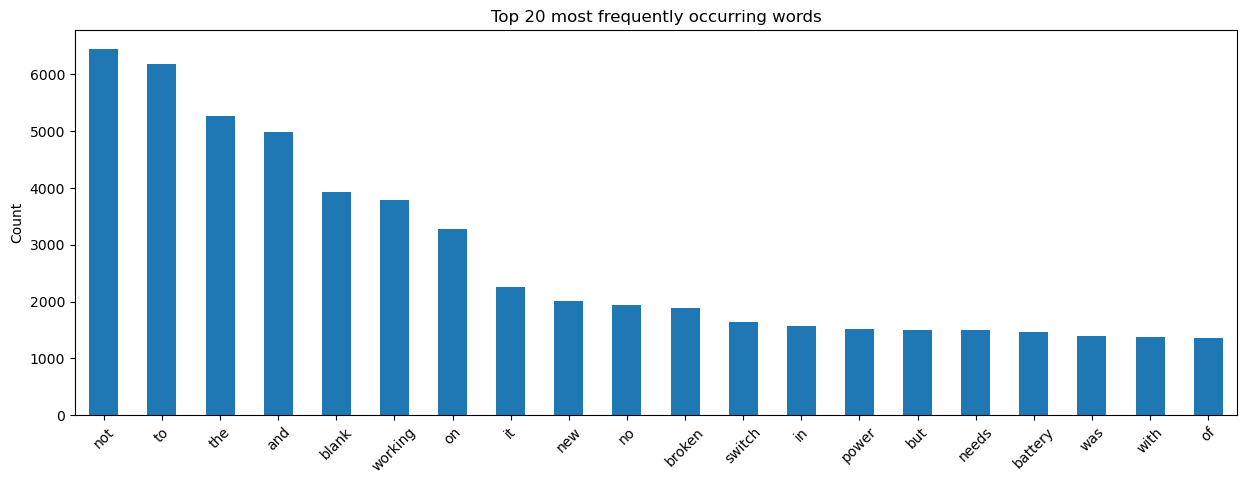

In [461]:
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

removing English stop words

In [462]:
bagofwords = CountVectorizer(stop_words="english")
bagofwords.fit(X_train)

X_train_transformed = bagofwords.transform(X_train) 
X_test_transformed = bagofwords.transform(X_test) 

X_train_transformed.shape

(26225, 9820)

bar graph of the Top 20 most frequently occurring words

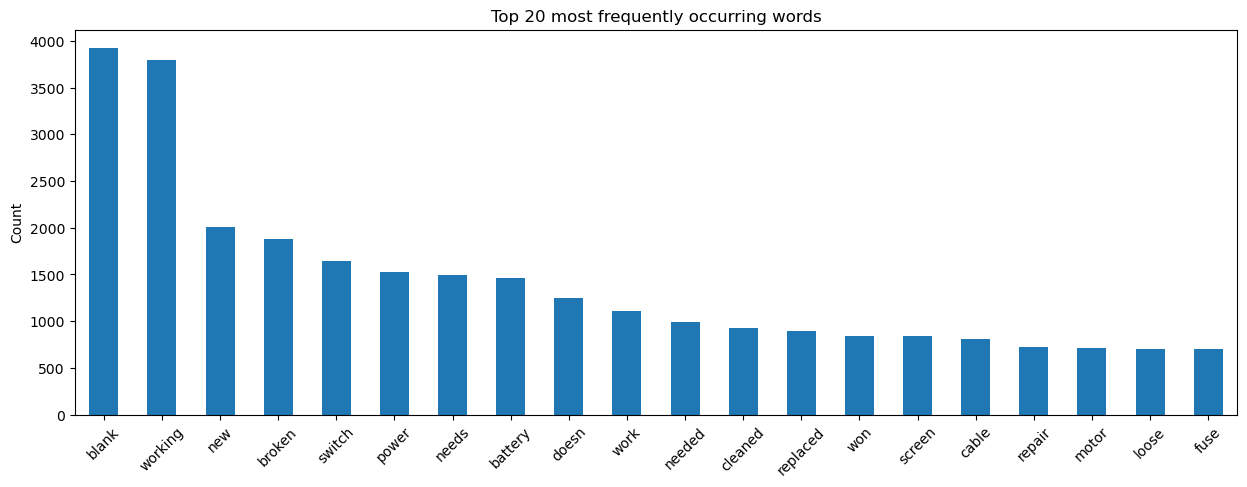

In [463]:
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [467]:
X_test_transformed = bagofwords.transform(X_test)
X_test_transformed

<6557x9820 sparse matrix of type '<class 'numpy.int64'>'
	with 31139 stored elements in Compressed Sparse Row format>

In [468]:
words = bagofwords.get_feature_names_out()
some_indices = range(1, 7348, round(7348/100))

samples = [words[i] for i in some_indices]
print(samples)

['001', '135', '24hrs', '427694', '80mah', 'accumulated', 'adv', 'aldi', 'anger', 'approved', 'assuming', 'awhile', 'b114', 'bach', 'batmobile', 'bentgood', 'blewn', 'booster', 'breifly', 'buggered', 'c012', 'caps', 'cause', 'chargeor', 'christmas', 'cleverly', 'coffin', 'completed', 'connecteur', 'controls', 'countdown', 'cronky', 'd3', 'december', 'demande', 'detergent', 'dil', 'disgarded', 'doenst', 'drag', 'dusty', 'eh80v', 'enable', 'es', 'expect', 'facebook', 'faulty', 'filtercaged', 'flashing', 'fob', 'free', 'fyer', 'gift', 'graunching', 'gut', 'harder', 'helicopter', 'hooverdoesn', 'hve', 'imprimante', 'ingrid', 'insulated', 'inverter', 'ivan', 'julys', 'knowledgeable', 'lawnmower', 'levers', 'lip', 'looses', 'magasin', 'march', 'mechnaism', 'microubs', 'mode', 'mow', 'needle', 'noticeable', 'offending', 'optimally', 'ouvrir', 'pairs', 'patiently', 'persist', 'pinion', 'plugging', 'possess', 'prepared', 'proceed', 'prying', 'qualified', 'raspberry', 'rebooting', 'recovered', '

In [470]:
counts = np.array(X_train_transformed[:, some_indices].sum(axis = 0))
display(pd.DataFrame({"total_corpus_count": counts[0]}, index=samples).T)

,001,135,24hrs,427694,80mah,accumulated,adv,aldi,anger,approved,...,raspberry,rebooting,recovered,reformatage,remain,replacment,resolvable,retune,rivet,ruptured
total_corpus_count,1,1,1,1,1,2,7,2,2,2,...,1,1,12,1,4,8,1,2,2,2


In [471]:
len(bagofwords.get_feature_names_out())

9820

In [472]:
X_train_transformed.toarray().sum(axis=0)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

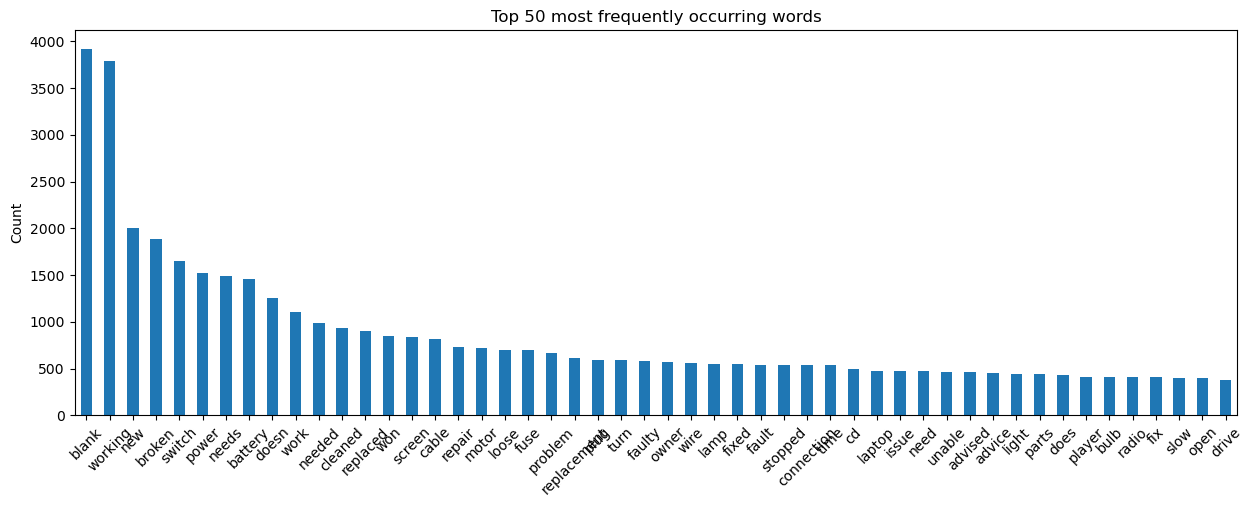

In [424]:
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(50).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 50 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [474]:
# Fitting a model
logreg = LogisticRegression(C = 0.2)
logreg.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train_transformed, y_train)}")
print(f"Test score: {logreg.score(X_test_transformed, y_test)}")

Train score: 0.6652812202097236
Test score: 0.6040872350160135


c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [475]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [476]:

# example of training a final classification model
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
# fit final model
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [477]:
y_pred = classifier.predict(X_test_transformed)

c:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 9820 features, but DecisionTreeClassifier is expecting 4795 features as input.

In [478]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [6557, 9774]

In [430]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

c:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: could not convert string to float: 'table lamp broken chip'